C 1.4.6

## Image Gradients

1. Sobel and Scharr Derivatives

2. Laplacian Derivatives

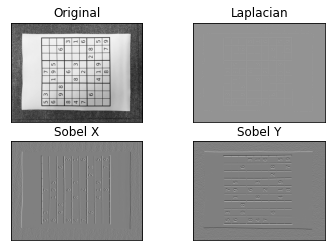

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('dave.jpg',0)
laplacian = cv2.Laplacian(img,cv2.CV_64F)
sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)
sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=5)

plt.subplot(2,2,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])

plt.subplot(2,2,2),plt.imshow(laplacian,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])

plt.subplot(2,2,3),plt.imshow(sobelx,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])

plt.subplot(2,2,4),plt.imshow(sobely,cmap = 'gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])

plt.show()


One Important Matter!

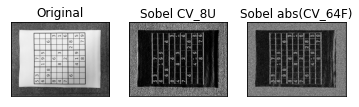

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('dave.jpg',0)
# Output dtype = cv2.CV_8U
sobelx8u = cv2.Sobel(img,cv2.CV_8U,1,0,ksize=5)
# Output dtype = cv2.CV_64F. Then take its absolute and convert to cv2.CV_8U
sobelx64f = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)
abs_sobel64f = np.absolute(sobelx64f)
sobel_8u = np.uint8(abs_sobel64f)

plt.subplot(1,3,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])

plt.subplot(1,3,2),plt.imshow(sobelx8u,cmap = 'gray')
plt.title('Sobel CV_8U'), plt.xticks([]), plt.yticks([])

plt.subplot(1,3,3),plt.imshow(sobel_8u,cmap = 'gray')
plt.title('Sobel abs(CV_64F)'), plt.xticks([]), plt.yticks([])

plt.show()

c 1.4.7

## Canny Edge Detection


1. Noise Reduction
2. Finding Intensity Gradient of the Image
3. Non-maximum Suppression
4. Hysteresis Thresholding


Canny Edge Detection in OpenCV


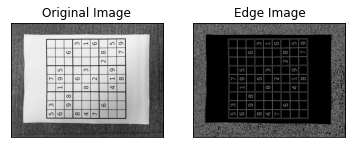

In [12]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('dave.jpg',0)
edges = cv2.Canny(img,100,200)

plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])

plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

plt.show()


c 1.4.8 Image Pyramids (skip)


c 1.4.9

## Contours in OpenCV (p.85~94)

## Contours : Getting Started

What are contours?

1

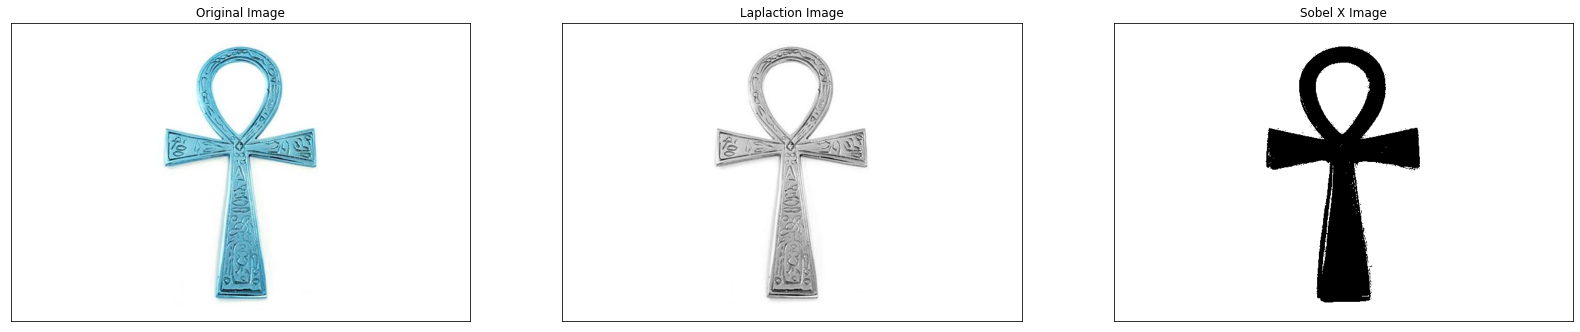

In [33]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

im = cv2.imread('The-Ankh.jpg') #The-Ankh.jpg
imgray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)

ret,thresh = cv2.threshold(imgray,245,255,0) #245,255


plt.figure(figsize=(28,8)) #그래프 사이즈 설정 - figsize(가로길이,세로길이)
plt.subplot(1, 3, 1), plt.imshow(im)
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(1, 3, 2), plt.imshow(imgray, cmap = 'gray')
plt.title('Laplaction Image'), plt.xticks([]), plt.yticks([])
plt.subplot(1, 3, 3), plt.imshow(thresh, cmap = 'gray')
plt.title('Sobel X Image'), plt.xticks([]), plt.yticks([])
plt.show()

In [34]:
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
img0 = im.copy()
img1 = im.copy()
img0 = cv2.drawContours(img0, contours, -1, (255,0,0), 3) #-1
img1 = cv2.drawContours(img1, contours, 3, (255,0,0), 3) #3

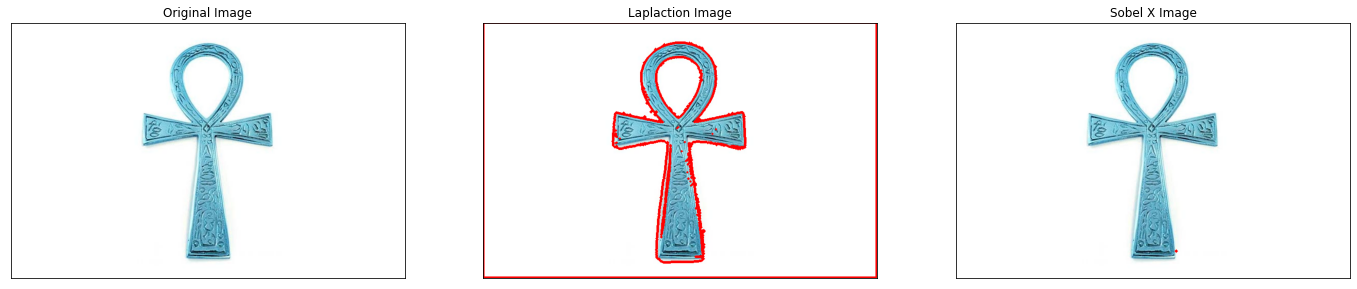

In [31]:
plt.figure(figsize=(24,8)) #그래프 사이즈 설정 - figsize(가로길이,세로길이)

plt.subplot(1, 3, 1), plt.imshow(im)
plt.title('Original Image'), plt.xticks([]), plt.yticks([])

plt.subplot(1, 3, 2), plt.imshow(img0, cmap= 'gray')
plt.title('Laplaction Image'), plt.xticks([]), plt.yticks([])

plt.subplot(1, 3, 3), plt.imshow(img1, cmap= 'gray')
plt.title('Sobel X Image'), plt.xticks([]), plt.yticks([])

plt.show()


2

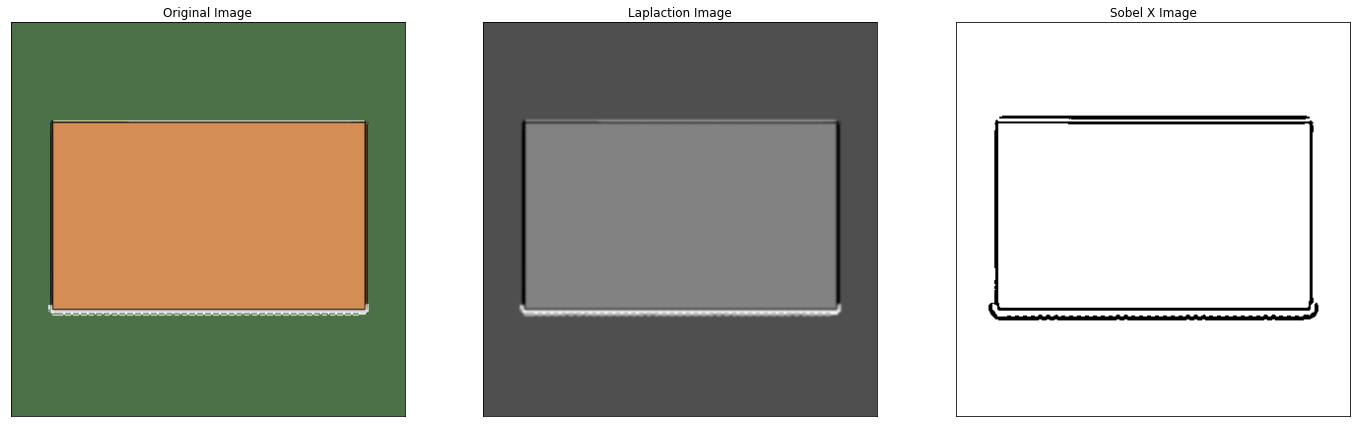

In [39]:
import numpy as np
import cv2

img = cv2.imread('rectangle.png')
imgray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
imgray = cv2.GaussianBlur(imgray,(5,5),0)

#ret, thresh = cv2.threshold(imgray,100,255,0)
thresh = cv2.adaptiveThreshold(imgray,255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

kernel = np.ones((5,5),np.uint8)
#erosion = cv2.erode(img,kernel,iterations = 1)
#dilation = cv2.dilate(img,kernel,iterations = 1)
#opening = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)
#closing = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)


plt.figure(figsize=(24,8)) #그래프 사이즈 설정 - figsize(가로길이,세로길이)
plt.subplot(1, 3, 1), plt.imshow(img)
plt.title('Original Image'), plt.xticks([]), plt.yticks([])

plt.subplot(1, 3, 2), plt.imshow(imgray, cmap = 'gray')
plt.title('Laplaction Image'), plt.xticks([]), plt.yticks([])

plt.subplot(1, 3, 3), plt.imshow(thresh, cmap = 'gray')
plt.title('Sobel X Image'), plt.xticks([]), plt.yticks([])
plt.show()


In [40]:
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

img0 = img.copy()
img1 = img.copy()

img0 = cv2.drawContours(img0, contours, 2, (255,0,0), 3)
img1 = cv2.drawContours(img1, contours, 3, (255,0,0), 3)


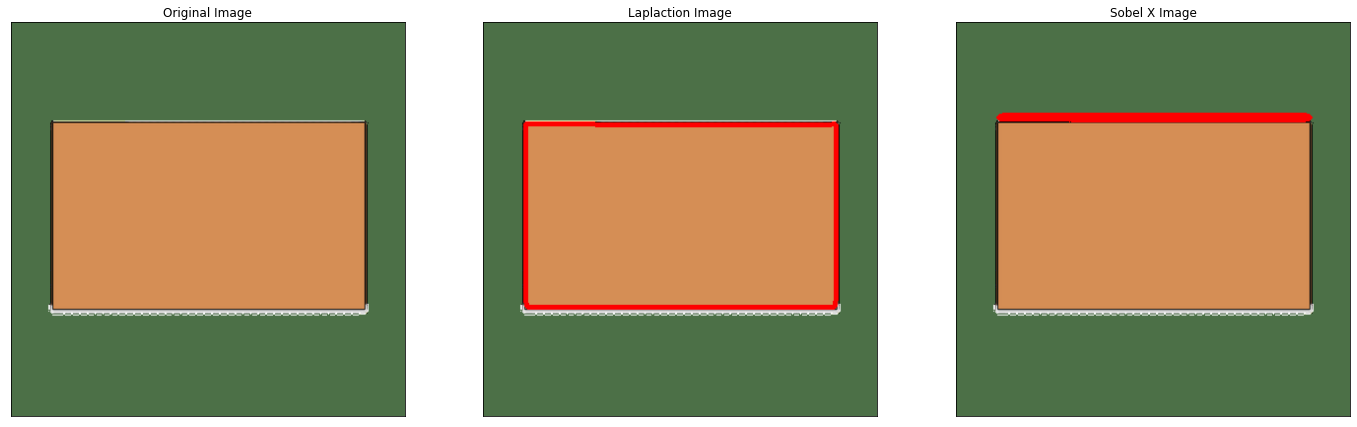

In [41]:
plt.figure(figsize=(24,8)) #그래프 사이즈 설정 - figsize(가로길이,세로길이)
plt.subplot(1, 3, 1), plt.imshow(img)
plt.title('Original Image'), plt.xticks([]), plt.yticks([])

plt.subplot(1, 3, 2), plt.imshow(img0, cmap= 'gray')
plt.title('Laplaction Image'), plt.xticks([]), plt.yticks([])

plt.subplot(1, 3, 3), plt.imshow(img1, cmap= 'gray')
plt.title('Sobel X Image'), plt.xticks([]), plt.yticks([])

plt.show()


In [42]:
print(len(contours))

4


In [43]:
print(contours)

(array([[[  0,   0]],

       [[  0, 399]],

       [[399, 399]],

       [[399,   0]]], dtype=int32), array([[[ 41,  98]],

       [[ 43, 100]],

       [[358, 100]],

       [[359,  99]],

       [[360,  99]],

       [[363, 102]],

       [[362, 103]],

       [[362, 104]],

       [[363, 105]],

       [[363, 111]],

       [[362, 112]],

       [[362, 279]],

       [[363, 280]],

       [[363, 284]],

       [[360, 287]],

       [[360, 291]],

       [[358, 293]],

       [[ 43, 293]],

       [[ 41, 291]],

       [[ 41, 288]],

       [[ 40, 287]],

       [[ 39, 287]],

       [[ 38, 286]],

       [[ 37, 286]],

       [[ 37, 291]],

       [[ 40, 294]],

       [[ 40, 295]],

       [[ 42, 297]],

       [[ 42, 298]],

       [[ 51, 298]],

       [[ 52, 297]],

       [[ 55, 297]],

       [[ 56, 298]],

       [[ 59, 298]],

       [[ 60, 297]],

       [[ 63, 297]],

       [[ 64, 298]],

       [[ 67, 298]],

       [[ 68, 297]],

       [[ 71, 297]],

       [[ 72, 298

## Contour Features

1. Moments

In [48]:
cnt = contours[2]
M = cv2.moments(cnt)
print(M)

cx = int(M['m10']/M['m00'])
cy = int(M['m01']/M['m00'])

img0 = cv2.rectangle(img0, (cx-2, cy-2), (cx+2, cy+2), (0, 0, 255), 2)

size = []
for i in range(len(contours)):
    size.append((i, contours[i].shape[0]))


{'m00': 58337.5, 'm10': 11688356.166666666, 'm01': 11455312.166666666, 'm20': 2824593489.9166665, 'm11': 2295873235.7916665, 'm02': 2416148073.9166665, 'm30': 759445116282.05, 'm21': 554861902429.1833, 'm12': 484326772253.35, 'm03': 539929049345.05005, 'mu20': 482743566.9879384, 'mu11': 715428.1319279671, 'mu02': 166751427.92084312, 'mu30': 74004519.66308594, 'mu21': -69737229.09992981, 'mu12': -47603482.87031174, 'mu03': 19994.337951660156, 'nu20': 0.14184723262318658, 'nu11': 0.00021021823509311254, 'nu02': 0.048997501373492874, 'nu30': 9.003030250403143e-05, 'nu21': -8.483892416629486e-05, 'nu12': -5.7912084053393495e-05, 'nu03': 2.4324139962679912e-08}


2. Contour Area

In [49]:
area = cv2.contourArea(cnt)

3. Contour Perimeter

In [50]:
perimeter = cv2.arcLength(cnt,True)

4. Contour Approximation

In [51]:
epsilon = 0.1*cv2.arcLength(cnt,True)
approx = cv2.approxPolyDP(cnt,epsilon,True)

5. Convex Hull

In [52]:
hull = cv2.convexHull(points[, hull[, clockwise[, returnPoints]]


SyntaxError: invalid syntax (3452574207.py, line 1)

In [53]:
hull = cv2.convexHull(cnt)


6. Checking Convexity

In [54]:
k = cv2.isContourConvex(cnt)

7.a. Straight Bounding Rectangle

In [55]:
x,y,w,h = cv2.boundingRect(cnt)
img = cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)



7.b. Rotated Rectangle


In [80]:
rect = cv2.minAreaRect(cnt)
box = cv2.boxPoints(rect)
box = np.int0(box)
im = cv2.drawContours(im,[box],0,(0,0,255),2)

8. Minimum Enclosing Circle

In [81]:
(x,y),radius = cv2.minEnclosingCircle(cnt)
center = (int(x),int(y))
radius = int(radius)
img = cv2.circle(img,center,radius,(0,255,0),2)

9. Fitting an Ellipse


In [82]:
ellipse = cv2.fitEllipse(cnt)
im = cv2.ellipse(im,ellipse,(0,255,0),2)


10. Fitting a Line


In [83]:
rows,cols = img.shape[:2]
[vx,vy,x,y] = cv2.fitLine(cnt, cv2.DIST_L2,0,0.01,0.01)
lefty = int((-x*vy/vx) + y)
righty = int(((cols-x)*vy/vx)+y)
img = cv2.line(img,(cols-1,righty),(0,lefty),(0,255,0),2)